<a href="https://colab.research.google.com/github/slapazromero/Ejercicio_Tensorflow/blob/main/Churn_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dataset
#https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
import pandas as pd
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Preparación de los datos

In [3]:
df = pd.read_csv('churn.csv')
print(len(df))
df.head().T

7043


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,0.0
753,3115-CZMZD,0.0
936,5709-LVOEQ,0.0
1082,4367-NUYAO,0.0
1340,1371-DWPAZ,0.0
3331,7644-OMVMY,0.0
3826,3213-VVOLG,0.0
4380,2520-SGTTA,0.0
5218,2923-ARZLG,0.0
6670,4075-WKNIU,0.0


In [6]:
replacer = lambda str: str.lower().str.replace(' ', '_')
df.columns = replacer(df.columns.str)
for col in list(df.dtypes[df.dtypes == 'object'].index):
    df[col] = replacer(df[col].str)
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
df.churn = (df.churn == 'yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [8]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
                'phoneservice', 'multiplelines', 'internetservice',
                'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport', 'streamingtv', 'streamingmovies',
                'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=1)
y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

df_train.head().T

,4204,7034,5146,5184,1310
customerid,4395-pzmsn,0639-tsiqw,3797-fkogq,7570-welny,6393-wryze
gender,male,female,male,female,female
seniorcitizen,1,0,0,0,0
partner,no,no,no,yes,yes
dependents,no,no,yes,no,no
tenure,5,67,11,68,34
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,yes,yes,yes,yes
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,fiber_optic
onlinesecurity,no,yes,no,yes,no


# Análisis de la importancia de las propiedades

In [10]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [11]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print(round(female_mean, 3))
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print(round(male_mean, 3))

0.277
0.263


In [12]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print(round(partner_yes, 3))
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print(round(partner_no, 3))

0.205
0.33


In [13]:
from sklearn.metrics import mutual_info_score

calculate_mi = lambda col: mutual_info_score(col, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [14]:
print(df_train_full[numerical].corrwith(df_train_full.churn))

print(round(df_train_full[df_train_full.tenure <= 2].churn.mean(), 3))
print(round(df_train_full[(df_train_full.tenure > 3) & 
                          (df_train_full.tenure <= 12)].churn.mean(), 3))
print(round(df_train_full[df_train_full.tenure > 12].churn.mean(), 3))

print(round(df_train_full[df_train_full.monthlycharges < 20].churn.mean(), 3))
print(round(df_train_full[(df_train_full.monthlycharges > 21) & 
                          (df_train_full.monthlycharges <= 50)].churn.mean(), 3))
print(round(df_train_full[df_train_full.monthlycharges > 50].churn.mean(), 3))

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64
0.595
0.391
0.176
0.088
0.223
0.325


# Ingeniería de propiedades

In [15]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dict(sorted(train_dict[0].items()))

{'contract': 'month-to-month',
 'dependents': 'no',
 'deviceprotection': 'no',
 'gender': 'male',
 'internetservice': 'fiber_optic',
 'monthlycharges': 85.55,
 'multiplelines': 'no',
 'onlinebackup': 'yes',
 'onlinesecurity': 'no',
 'paperlessbilling': 'yes',
 'partner': 'no',
 'paymentmethod': 'electronic_check',
 'phoneservice': 'yes',
 'seniorcitizen': 1,
 'streamingmovies': 'yes',
 'streamingtv': 'no',
 'techsupport': 'no',
 'tenure': 5,
 'totalcharges': 408.5}

In [16]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [17]:
X_train = dv.transform(train_dict)
X_train[0]

array([  1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   1.  ,   0.  ,  85.55,   1.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,   0.  ,
         1.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   1.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   5.  , 408.5 ])

In [18]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

# Entrenamiento del modelo

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [20]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)
y_pred

array([[0.99142714, 0.00857286],
       [0.79028712, 0.20971288],
       [0.78364454, 0.21635546],
       ...,
       [0.35664296, 0.64335704],
       [0.81055916, 0.18944084],
       [0.87261929, 0.12738071]])

In [21]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00857286, 0.20971288, 0.21635546, ..., 0.64335704, 0.18944084,
       0.12738071])

In [22]:
churn = y_pred >= 0.5
churn

array([False, False, False, ...,  True, False, False])

In [23]:
# precisión del modelo con los datos de entrenamiento
round((y_val == churn).mean(), 3) 

0.805

# Modelo

In [24]:
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)
y_pred

array([[0.99142714, 0.00857286],
       [0.79028712, 0.20971288],
       [0.78364454, 0.21635546],
       ...,
       [0.35664296, 0.64335704],
       [0.81055916, 0.18944084],
       [0.87261929, 0.12738071]])

# TensorFlow

In [27]:
# define the keras model
model = Sequential()
input_shape = len(X_train[0])
print('Numero de entradas:',input_shape)

model.add(Dense(int(len(X_train[0])), input_shape=(input_shape,), activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(int(len(X_train[0])/2), activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

Numero de entradas: 45


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 45)                2070      
                                                                 
 dense_4 (Dense)             (None, 22)                1012      
                                                                 
 dense_5 (Dense)             (None, 1)                 23        
                                                                 
Total params: 3,105
Trainable params: 3,105
Non-trainable params: 0
_________________________________________________________________


In [29]:
# compile the keras model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [30]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, epochs=500, batch_size=384)

Epoch 1/500
10/10 [==============================] - 1s 4ms/step - loss: 195.3518 - accuracy: 0.2676
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 21.2051 - accuracy: 0.6961
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 33.1846 - accuracy: 0.7295
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 23.3711 - accuracy: 0.7295
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 8.0797 - accuracy: 0.6060
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 4.0133 - accuracy: 0.7019
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 2.2645 - accuracy: 0.6137
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 2.1537 - accuracy: 0.6773
Epoch 9/500
10/10 [==============================] - 0s 5ms/step - loss: 1.3201 - accuracy: 0.6868
Epoch 10/500
10/10 [==============================] - 0s 5ms/step - loss: 0.9600 - accuracy: 0.6873
Epoc

In [32]:
# evaluate the keras model
loss, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

118/118 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.8018
Accuracy: 80.18


In [33]:
model.history

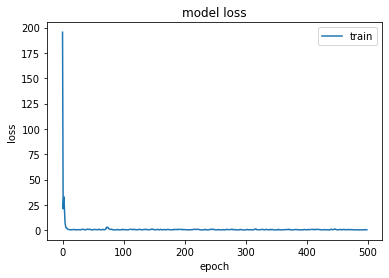

In [34]:
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

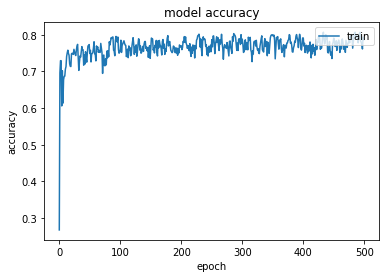

In [35]:
plt.plot(history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

# Dos salidas

In [36]:
# define the keras model
model_dos_sal = Sequential()
model_dos_sal.add(Dense(12, input_shape=(len(X_train[0]),), activation='relu'))
model_dos_sal.add(Dense(8, activation='relu'))
model_dos_sal.add(Dense(2, activation='softmax'))

In [37]:
# compile the keras model
model_dos_sal.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
df_y = pd.DataFrame(y_train, columns=['churn'])

In [39]:
y_train_dos_salidas = pd.get_dummies(df_y['churn'])

In [40]:
y_train_dos_salidas

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
3769,1,0
3770,1,0
3771,0,1
3772,1,0


In [41]:
history_dos_sal = model_dos_sal.fit(X_train, y_train_dos_salidas, epochs=1000, batch_size=768)

Epoch 1/1000
5/5 [==============================] - 1s 4ms/step - loss: 18.2208 - accuracy: 0.7281
Epoch 2/1000
5/5 [==============================] - 0s 4ms/step - loss: 16.2096 - accuracy: 0.7281
Epoch 3/1000
5/5 [==============================] - 0s 4ms/step - loss: 14.4271 - accuracy: 0.7281
Epoch 4/1000
5/5 [==============================] - 0s 4ms/step - loss: 13.2965 - accuracy: 0.7281
Epoch 5/1000
5/5 [==============================] - 0s 5ms/step - loss: 12.2864 - accuracy: 0.7281
Epoch 6/1000
5/5 [==============================] - 0s 4ms/step - loss: 11.3716 - accuracy: 0.7281
Epoch 7/1000
5/5 [==============================] - 0s 4ms/step - loss: 10.4392 - accuracy: 0.7281
Epoch 8/1000
5/5 [==============================] - 0s 4ms/step - loss: 9.6117 - accuracy: 0.7281
Epoch 9/1000
5/5 [==============================] - 0s 4ms/step - loss: 8.8378 - accuracy: 0.7281
Epoch 10/1000
5/5 [==============================] - 0s 5ms/step - loss: 8.1010 - accuracy: 0.7281
Epoch 11/100

In [42]:
# evaluate the keras model
loss, accuracy = model_dos_sal.evaluate(X_train, y_train_dos_salidas)
print('Accuracy: %.2f' % (accuracy*100))

118/118 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8145
Accuracy: 81.45


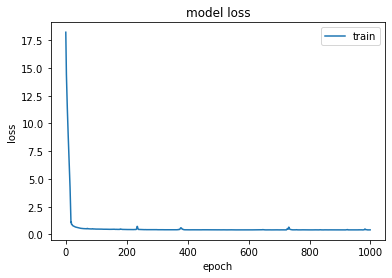

In [43]:
plt.plot(history_dos_sal.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

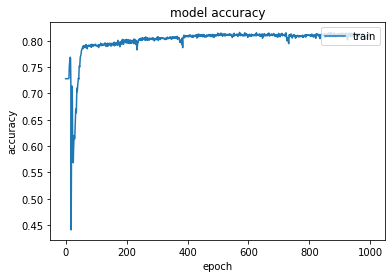

In [44]:
plt.plot(history_dos_sal.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()